In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

/home/vscode/.local/lib/python3.10/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [3]:
def getIMP(root, imageFile):
    test_root = os.path.join(root, 'slice', 's_test') #'/workspaces/data/brain_meningioma/slice/s_test'
    prob_roots = [os.path.join(root, 'oProb', model, 's_test') #f'/workspaces/data/brain_meningioma/oProb/{model}/s_test'
                for model in ['unet1s','unetpp0','unetpp0D'] ]

    maskFile = imageFile.replace('_img.npy', '_mask.npy')
    probFile = imageFile.replace('_img.npy', '_mask.pt')

    imagePath = os.path.join(test_root, 'npy', imageFile)
    maskPath = os.path.join(test_root, 'npy', maskFile)
    probPaths = [os.path.join(prob_root, 'pt', probFile) for prob_root in prob_roots]

    return imagePath, maskPath, probPaths

In [15]:
plt.style.use('dark_background')
def plotIMP(imagePath, maskPath, probPaths, size=8,alphas=(0.1,0.5,0)):
    image = np.load(imagePath)
    mask = np.load(maskPath)
    preds = [ (torch.load(probPath,weights_only=False).cpu().numpy() >0.5).squeeze() for probPath in probPaths ]
    
    fig = plt.figure(figsize=(size,size*2))
    fig.tight_layout(pad=0)
    plt.subplot(2, 1, 1)
    plt.imshow(image, cmap="gray")
    plt.gca().set_axis_off()  
    plt.subplot(2, 1, 2)
    plt.imshow(image, cmap="gray")
    plt.gca().set_axis_off()  
    masked_mask = np.ma.masked_where(mask == 0, mask)
    plt.imshow(masked_mask, cmap=plt.cm.colors.ListedColormap(['red']), 
             alpha=alphas[0])
    fig = plt.figure(figsize=(3*size,size))
    fig.tight_layout(pad=0)
    # if figsize[0]< figsize[1]:
    #     plt.subplot(4, 1, 1)
    # else:
    plt.subplot(1, 3, 1)
    plt.gca().set_axis_off()
    plt.imshow(image, cmap="gray")
    for i, pred in enumerate(preds):
        # if figsize[0]< figsize[1]:
        #     plt.subplot(4, 1, i+2)
        # else:
        plt.subplot(1, 3, i+1)
        plt.gca().set_axis_off()   
        plt.imshow(image, cmap="gray")
        masked_mask = np.ma.masked_where(mask == 0, mask)
        plt.imshow(masked_mask, cmap=plt.cm.colors.ListedColormap(['red']), alpha=alphas[0])
        masked_pred = np.ma.masked_where(pred == 0, pred)
        plt.imshow(masked_pred, cmap=plt.cm.colors.ListedColormap(['green']), alpha=alphas[1])
        plt.imshow(masked_pred*masked_mask, cmap=plt.cm.colors.ListedColormap(['yellow']), alpha=alphas[2])
    
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    plt.margins(0)
    fig.patch.set_alpha(0)

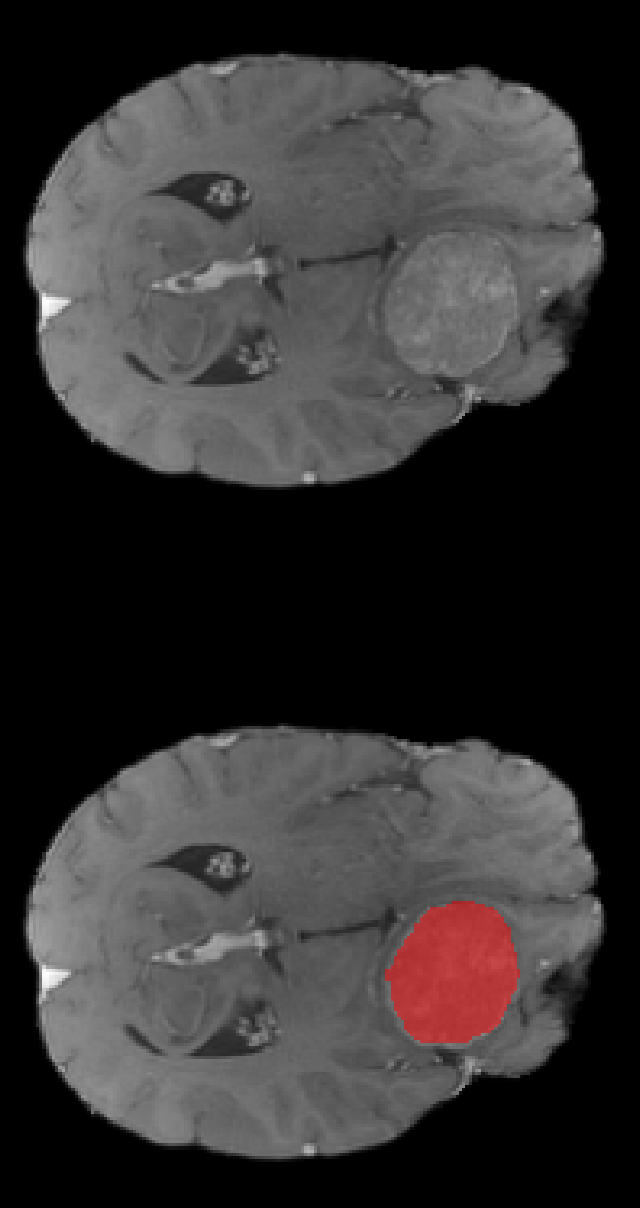

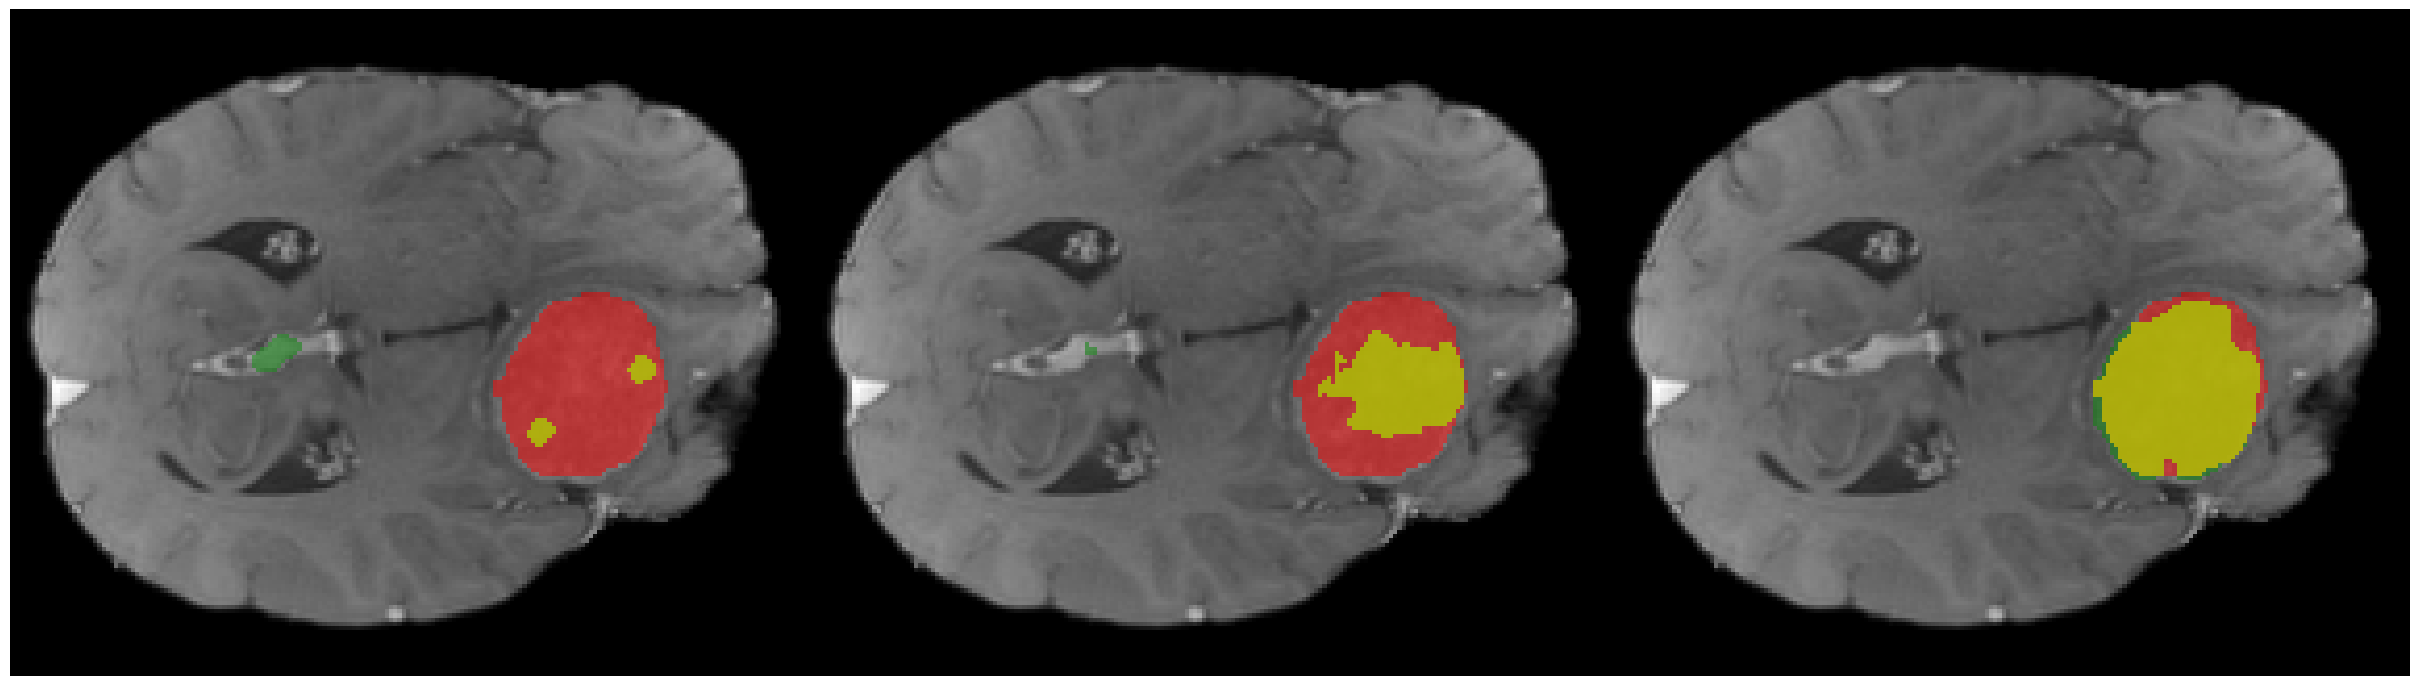

In [16]:
#전두엽 시각화
plotIMP(*getIMP('/workspaces/data/brain_meningioma', 'BraTS-MEN-RT-0385-1_slice_090_img.npy',),
        size=8,alphas=(0.5,0.5,0.5))

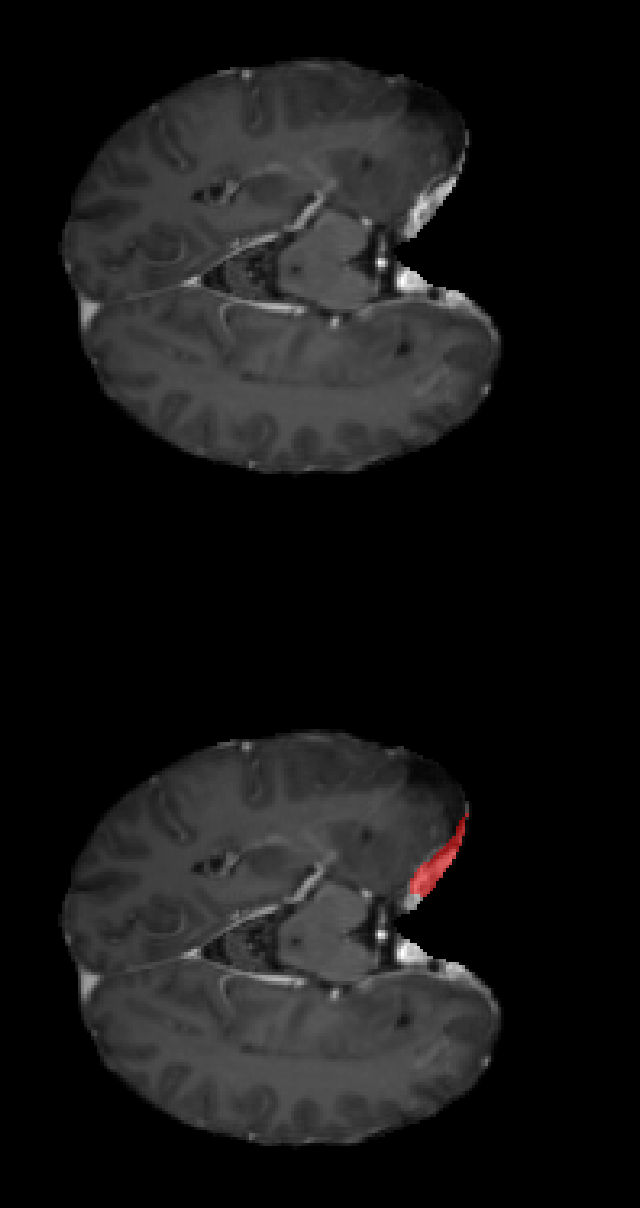

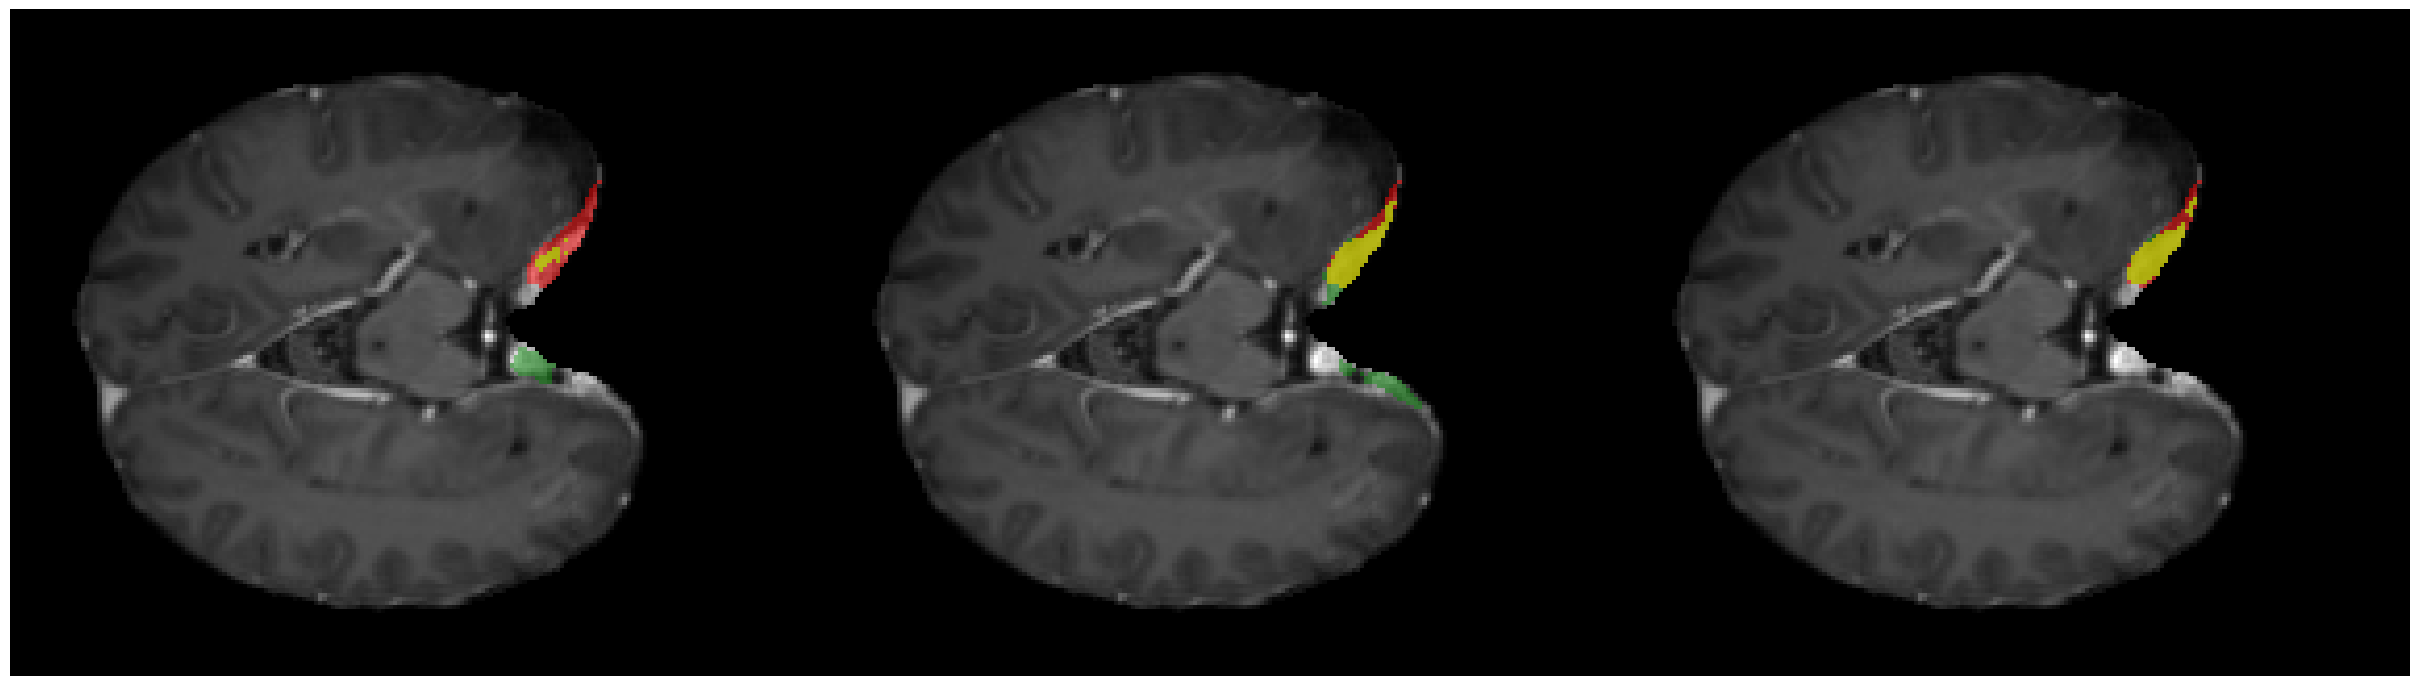

In [17]:
#측두엽 시각화
plotIMP(*getIMP('/workspaces/data/brain_meningioma', 
                'BraTS-MEN-RT-0165-1_slice_067_img.npy'),
                size=8,alphas=(0.5,0.5,0.5))

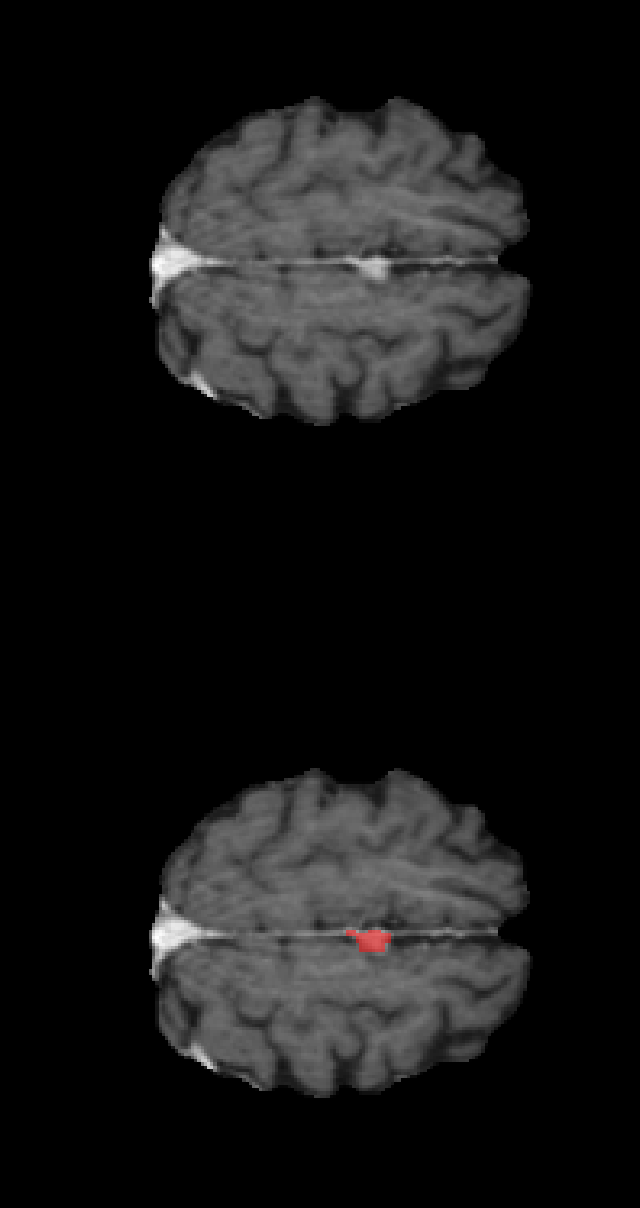

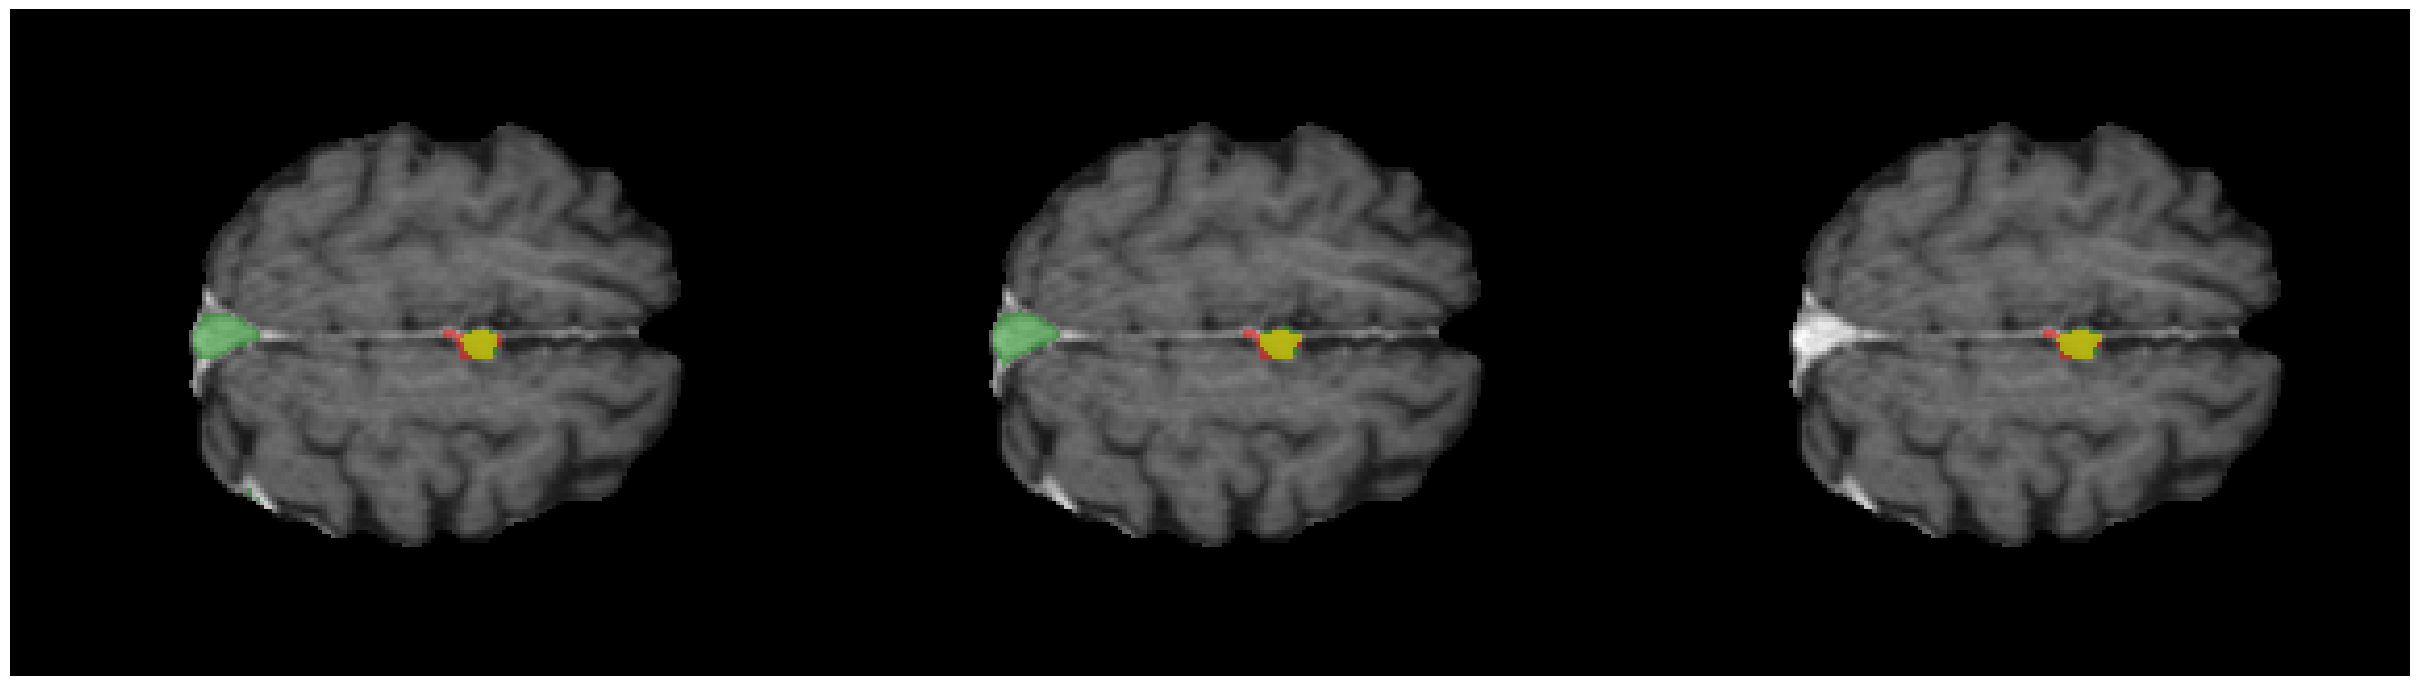

In [18]:
#작은 종양 시각화(1)
plotIMP(*getIMP('/workspaces/data/brain_meningioma', 'BraTS-MEN-RT-0320-1_slice_168_img.npy'),
        size=8,alphas=(0.5,0.5,0.5))


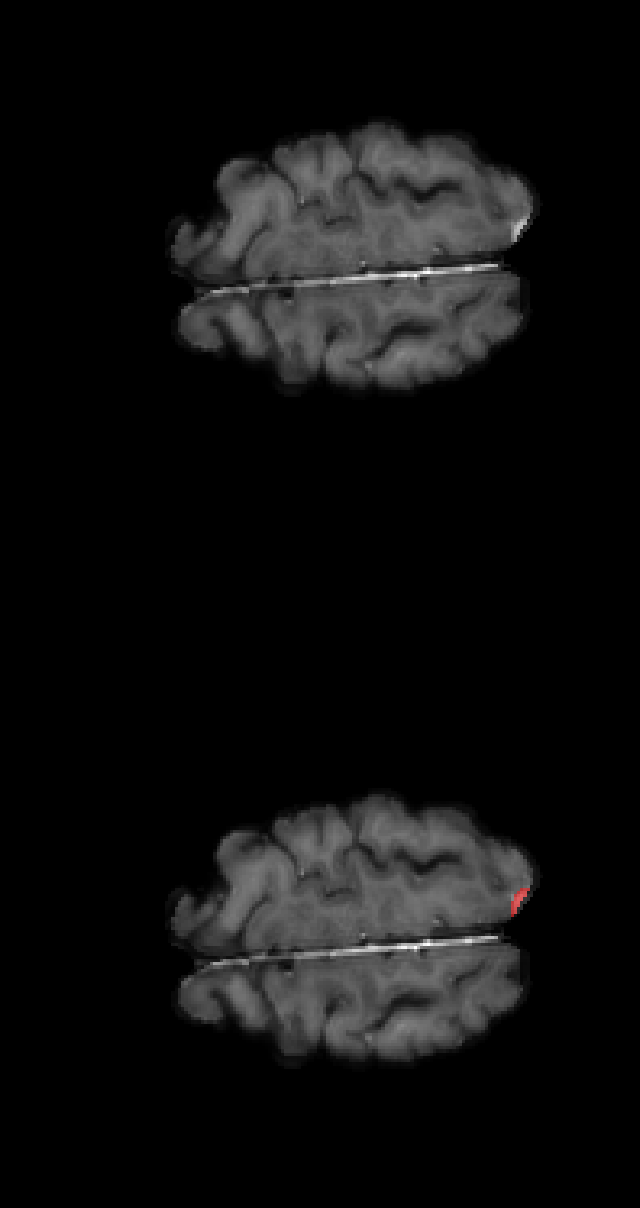

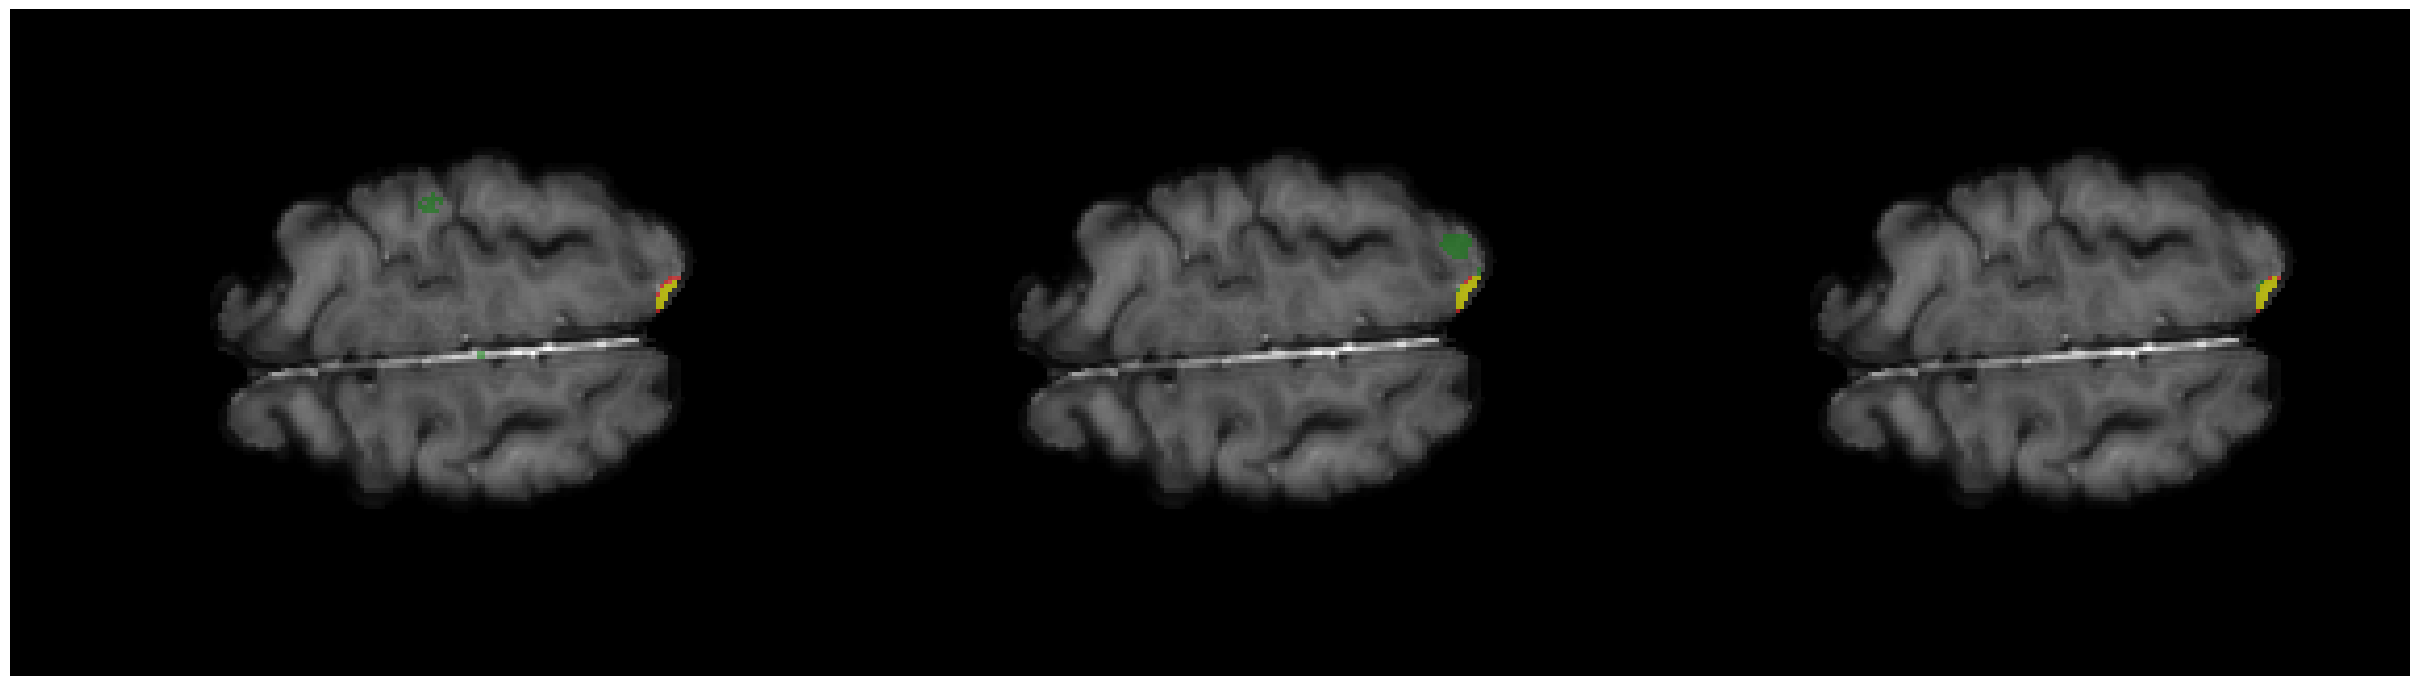

In [19]:
#작은 종양 시각화(2)
plotIMP(*getIMP('/workspaces/data/brain_meningioma', 'BraTS-MEN-RT-0053-1_slice_132_img.npy'),
        size=8,alphas=(0.5,0.5,0.5))


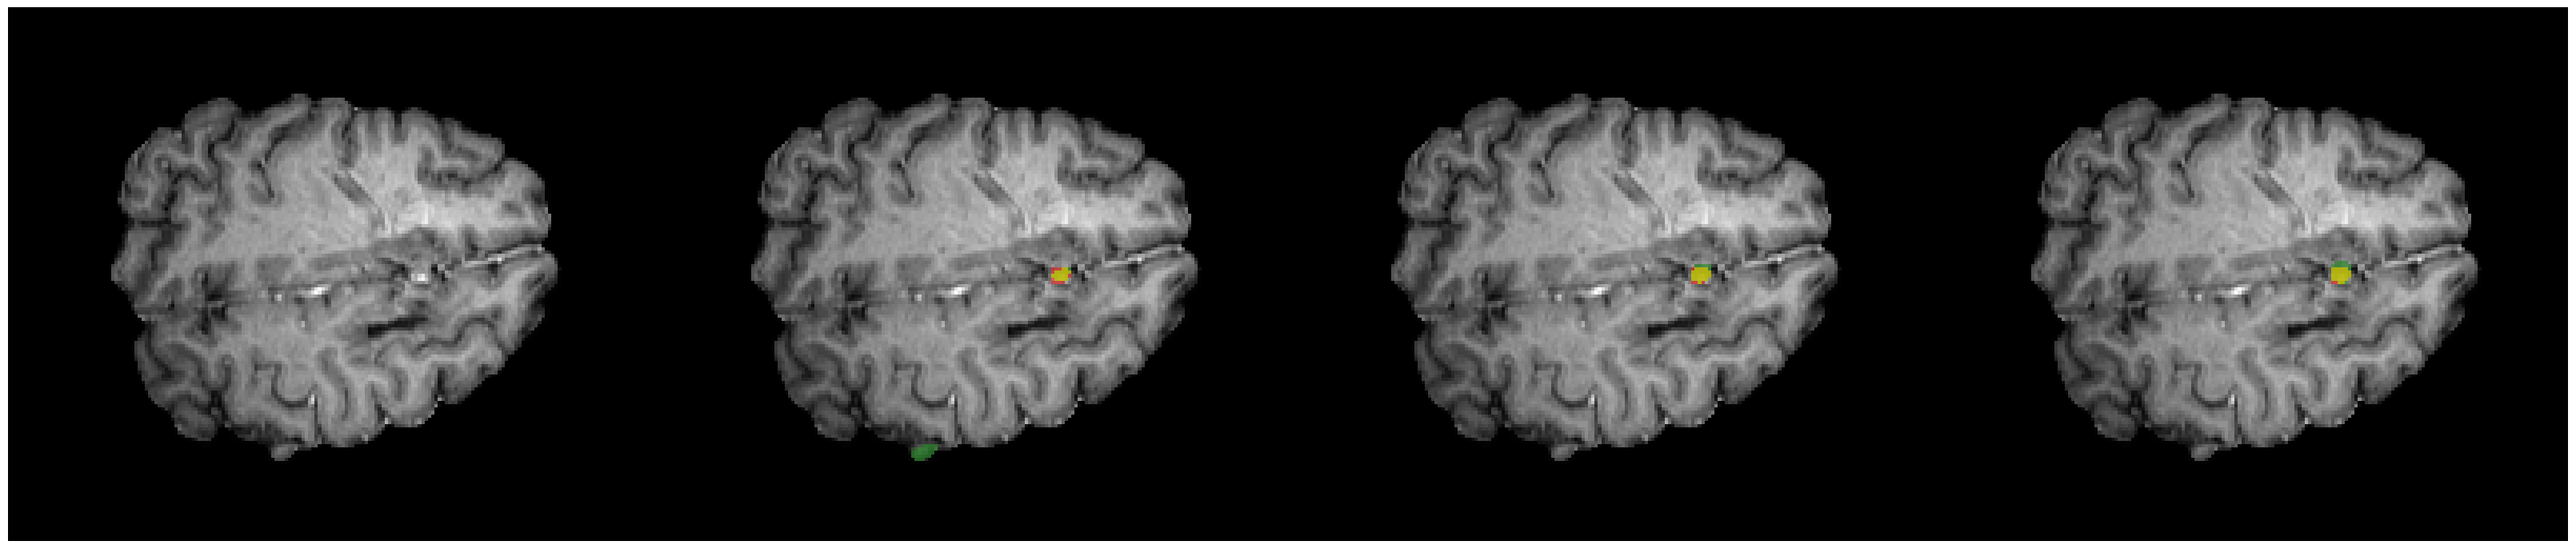

In [ ]:
#작은 종양 시각화(3)
plotIMP(*getIMP('/workspaces/data/brain_meningioma', 'BraTS-MEN-RT-0256-1_slice_143_img.npy'),
        size=8,alphas=(0.5,0.5,0.5))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 6))

# Define a GridSpec with 1 row and 2 columns for the main layout
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 1])

# Create a nested GridSpec for the vertical stack on the left
gs_left = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], hspace=0.3)

# Create the subplots for the vertical stack
ax1 = fig.add_subplot(gs_left[0, 0])
ax2 = fig.add_subplot(gs_left[1, 0])

# Create the single subplot on the right
ax3 = fig.add_subplot(gs[0, 1],figsize=(3, 3))

# Add titles or content to demonstrate
ax1.set_title("Stacked Plot 1")
ax2.set_title("Stacked Plot 2")
ax3.set_title("Single Plot")

plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show()

In [ ]:
# imageFile = 'BraTS-MEN-RT-0237-1_slice_170_img.npy'